Root Mean Squared Error (RMSE): 7.31
R² Score: 0.68


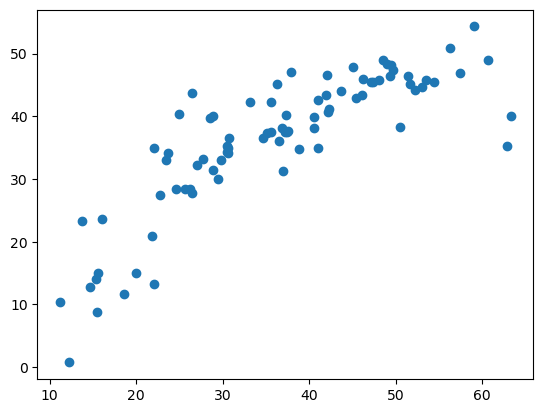

In [9]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.scatter(y_test, y_pred)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Confusion Matrix:
[[36 12]
 [ 3 32]]


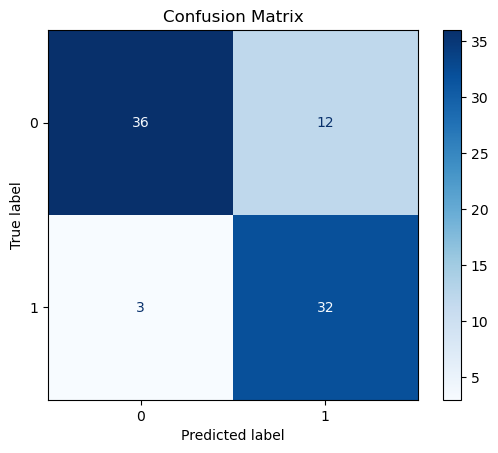

Mean house price (threshold): 38.39
Accuracy: 0.82
Coefficients: [[ 0.23214581 -0.61188582 -2.38300698  0.55330495  0.9400307  -0.13234689]]
Intercept: [-0.62572427]


In [10]:
import matplotlib.pyplot as plt


mean_price = y_train.mean().values[0]

y_train_binary = (y_train > mean_price).astype(int)
y_test_binary = (y_test > mean_price).astype(int)

y_train_binary_flat = y_train_binary.values.ravel()
y_test_binary_flat = y_test_binary.values.ravel()

log_model = LogisticRegression()
log_model.fit(X_train, y_train_binary_flat)

y_pred_binary = log_model.predict(X_test)

accuracy = accuracy_score(y_test_binary_flat, y_pred_binary)

cm = confusion_matrix(y_test_binary_flat, y_pred_binary)
print("Confusion Matrix:")
print(cm)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

print(f"Mean house price (threshold): {mean_price:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"Coefficients: {log_model.coef_}")
print(f"Intercept: {log_model.intercept_}")